# Keras CIFAR10をCNNで分類

この論文のAll-CNN-Cをやってみた
http://arxiv.org/pdf/1412.6806.pdf

In [ ]:
# https://gist.github.com/juntaki/e50200c82d6f3a5143e7b206a0ab2451
# https://github.com/NervanaSystems/neon/blob/master/examples/cifar10_allcnn.py

In [60]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D
from keras.optimizers import *
from sklearn import datasets, preprocessing
from keras.regularizers import l2

In [20]:
batch_size = 32
nb_classes = 10
nb_epoch = 10
data_augmentation = True

# input image dimensions
img_rows, img_cols = 32, 32
# the CIFAR10 images are RGB
img_channels = 3

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes) 

('X_train shape:', (50000, 3, 32, 32))
(50000, 'train samples')
(10000, 'test samples')


array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

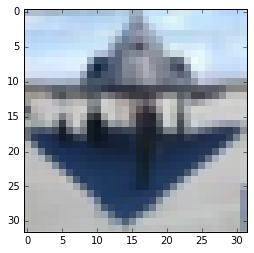

In [21]:
number = 404
img = X_train[number].reshape(3,32,32)
img1 = np.rollaxis(img, 0 ,3)
img1.shape
plt.imshow(img1, interpolation='none')
Y_train[number]

In [35]:
model = Sequential()
model.add(Dropout(0.2, input_shape=(3, 32, 32)))
model.add(Convolution2D(96, 3, 3, border_mode="same", W_regularizer=l2(0.001) ))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3, border_mode="same", W_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3, border_mode="same", subsample=(2,2), W_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(192, 3, 3, border_mode="same", W_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3, border_mode="same", W_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3, border_mode="same", subsample=(2,2), W_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(192, 3, 3, border_mode="same", W_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Convolution2D(192, 1, 1, border_mode="same", W_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Convolution2D(10, 1, 1, border_mode="same", W_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(8, 8), border_mode='valid'))
model.add(Flatten())
model.add(Activation("softmax"))

#op = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
#model.compile(loss='categorical_crossentropy', optimizer=op, metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer="adadelta", metrics=['accuracy'])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dropout_51 (Dropout)             (None, 3, 32, 32)     0           dropout_input_16[0][0]           
____________________________________________________________________________________________________
convolution2d_154 (Convolution2D)(None, 96, 32, 32)    2688        dropout_51[0][0]                 
____________________________________________________________________________________________________
activation_171 (Activation)      (None, 96, 32, 32)    0           convolution2d_154[0][0]          
____________________________________________________________________________________________________
convolution2d_155 (Convolution2D)(None, 96, 32, 32)    83040       activation_171[0][0]             
___________________________________________________________________________________________

In [47]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

model.fit_generator(datagen.flow(X_train, Y_train,
                        batch_size=batch_size),
                        samples_per_epoch=X_train.shape[0],
                        nb_epoch=nb_epoch,
                        validation_data=(X_test, Y_test))

Epoch 1/10
50000/50000 [==============================] - 111s - loss: 0.3111 - acc: 0.8925 - val_loss: 0.5782 - val_acc: 0.8121
Epoch 2/10
50000/50000 [==============================] - 110s - loss: 0.2975 - acc: 0.8956 - val_loss: 0.6200 - val_acc: 0.8118
Epoch 3/10
50000/50000 [==============================] - 111s - loss: 0.2955 - acc: 0.8960 - val_loss: 0.6222 - val_acc: 0.8001
Epoch 4/10
50000/50000 [==============================] - 111s - loss: 0.2837 - acc: 0.9002 - val_loss: 0.5842 - val_acc: 0.8134
Epoch 5/10
50000/50000 [==============================] - 110s - loss: 0.2723 - acc: 0.9052 - val_loss: 0.5725 - val_acc: 0.8201
Epoch 6/10
50000/50000 [==============================] - 110s - loss: 0.2674 - acc: 0.9055 - val_loss: 0.5690 - val_acc: 0.8195
Epoch 7/10
50000/50000 [==============================] - 110s - loss: 0.2608 - acc: 0.9089 - val_loss: 0.6147 - val_acc: 0.8085
Epoch 8/10
50000/50000 [==============================] - 110s - loss: 0.2578 - acc: 0.9095 - val

In [39]:
model.fit_generator(datagen.flow(X_train, Y_train,
                        batch_size=batch_size),
                        samples_per_epoch=X_train.shape[0],
                        nb_epoch=nb_epoch,
                        validation_data=(X_test, Y_test))

Epoch 1/10
50000/50000 [==============================] - 111s - loss: 0.5089 - acc: 0.8258 - val_loss: 0.6287 - val_acc: 0.7854
Epoch 2/10
50000/50000 [==============================] - 110s - loss: 0.4826 - acc: 0.8333 - val_loss: 0.5982 - val_acc: 0.7973
Epoch 3/10
50000/50000 [==============================] - 110s - loss: 0.4597 - acc: 0.8402 - val_loss: 0.7436 - val_acc: 0.7491
Epoch 4/10
50000/50000 [==============================] - 110s - loss: 0.4393 - acc: 0.8473 - val_loss: 0.6234 - val_acc: 0.7918
Epoch 5/10
50000/50000 [==============================] - 110s - loss: 0.4190 - acc: 0.8532 - val_loss: 0.6460 - val_acc: 0.7916
Epoch 6/10
50000/50000 [==============================] - 110s - loss: 0.4032 - acc: 0.8592 - val_loss: 0.6062 - val_acc: 0.7997
Epoch 7/10
50000/50000 [==============================] - 110s - loss: 0.3864 - acc: 0.8645 - val_loss: 0.6143 - val_acc: 0.7883
Epoch 8/10
50000/50000 [==============================] - 111s - loss: 0.3721 - acc: 0.8699 - val

In [41]:
model.fit_generator(datagen.flow(X_train, Y_train,
                        batch_size=batch_size),
                        samples_per_epoch=X_train.shape[0],
                        nb_epoch=100,
                        validation_data=(X_test, Y_test))

Epoch 1/100
26176/50000 [==============>...............] - ETA: 50s - loss: 0.3080 - acc: 0.8934

KeyboardInterrupt: 

In [48]:
def make_model (optimizer):
  model = Sequential()
  model.add(Dropout(0.2, input_shape=(3, 32, 32)))
  model.add(Convolution2D(96, 3, 3, border_mode="same", W_regularizer=l2(0.001) ))
  model.add(Activation('relu'))
  model.add(Convolution2D(96, 3, 3, border_mode="same", W_regularizer=l2(0.001)))
  model.add(Activation('relu'))
  model.add(Convolution2D(96, 3, 3, border_mode="same", subsample=(2,2), W_regularizer=l2(0.001)))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Convolution2D(192, 3, 3, border_mode="same", W_regularizer=l2(0.001)))
  model.add(Activation('relu'))
  model.add(Convolution2D(192, 3, 3, border_mode="same", W_regularizer=l2(0.001)))
  model.add(Activation('relu'))
  model.add(Convolution2D(192, 3, 3, border_mode="same", subsample=(2,2), W_regularizer=l2(0.001)))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Convolution2D(192, 3, 3, border_mode="same", W_regularizer=l2(0.001)))
  model.add(Activation('relu'))
  model.add(Convolution2D(192, 1, 1, border_mode="same", W_regularizer=l2(0.001)))
  model.add(Activation('relu'))
  model.add(Convolution2D(10, 1, 1, border_mode="same", W_regularizer=l2(0.001)))
  model.add(Activation('relu'))
  model.add(AveragePooling2D(pool_size=(8, 8), border_mode='valid'))
  model.add(Flatten())
  model.add(Activation("softmax"))

  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  model.summary()
  return model

def make_detagen ():
  datagen = ImageDataGenerator(
          featurewise_center=False,  # set input mean to 0 over the dataset
          samplewise_center=False,  # set each sample mean to 0
          featurewise_std_normalization=False,  # divide inputs by std of the dataset
          samplewise_std_normalization=False,  # divide each input by its std
          zca_whitening=False,  # apply ZCA whitening
          rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
          width_shift_range=0.,  # randomly shift images horizontally (fraction of total width)
          height_shift_range=0.,  # randomly shift images vertically (fraction of total height)
          horizontal_flip=False,  # randomly flip images
          vertical_flip=False)  # randomly flip images

  datagen.fit(X_train)
  return datagen

In [52]:

#op = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
op = SGD(lr=0.05, decay=1e-6, momentum=0.9, nesterov=True)
model2 = make_model("sgd")
datagen2 = make_detagen()
model2.fit_generator(datagen2.flow(X_train, Y_train,
                        batch_size=batch_size),
                        samples_per_epoch=X_train.shape[0],
                        nb_epoch=nb_epoch,
                        validation_data=(X_test, Y_test))

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dropout_60 (Dropout)             (None, 3, 32, 32)     0           dropout_input_19[0][0]           
____________________________________________________________________________________________________
convolution2d_181 (Convolution2D)(None, 96, 32, 32)    2688        dropout_60[0][0]                 
____________________________________________________________________________________________________
activation_201 (Activation)      (None, 96, 32, 32)    0           convolution2d_181[0][0]          
____________________________________________________________________________________________________
convolution2d_182 (Convolution2D)(None, 96, 32, 32)    83040       activation_201[0][0]             
___________________________________________________________________________________________

KeyboardInterrupt: 

In [53]:
model2.fit_generator(datagen.flow(X_train, Y_train,
                        batch_size=batch_size),
                        samples_per_epoch=X_train.shape[0],
                        nb_epoch=100,
                        validation_data=(X_test, Y_test))

Epoch 1/100
50000/50000 [==============================] - 106s - loss: 2.1376 - acc: 0.2253 - val_loss: 1.9873 - val_acc: 0.2958
Epoch 2/100
50000/50000 [==============================] - 105s - loss: 1.9683 - acc: 0.2983 - val_loss: 1.9630 - val_acc: 0.2874
Epoch 3/100
50000/50000 [==============================] - 105s - loss: 1.8239 - acc: 0.3598 - val_loss: 1.7261 - val_acc: 0.3978
Epoch 4/100
50000/50000 [==============================] - 105s - loss: 1.7311 - acc: 0.4017 - val_loss: 1.6492 - val_acc: 0.4289
Epoch 5/100
50000/50000 [==============================] - 105s - loss: 1.5877 - acc: 0.4316 - val_loss: 1.6507 - val_acc: 0.4034
Epoch 6/100
50000/50000 [==============================] - 105s - loss: 1.4784 - acc: 0.4657 - val_loss: 1.4966 - val_acc: 0.4373
Epoch 7/100
50000/50000 [==============================] - 105s - loss: 1.4114 - acc: 0.4915 - val_loss: 1.3984 - val_acc: 0.4823
Epoch 8/100
50000/50000 [==============================] - 105s - loss: 1.3450 - acc: 0.51

KeyboardInterrupt: 

In [68]:
model2.fit_generator(datagen.flow(X_train, Y_train,
                        batch_size=batch_size),
                        samples_per_epoch=X_train.shape[0],
                        nb_epoch=100,
                        validation_data=(X_test, Y_test))

Epoch 1/100
50000/50000 [==============================] - 105s - loss: 0.3051 - acc: 0.8924 - val_loss: 0.6202 - val_acc: 0.7929
Epoch 2/100
50000/50000 [==============================] - 105s - loss: 0.3036 - acc: 0.8931 - val_loss: 0.5756 - val_acc: 0.8044
Epoch 3/100
50000/50000 [==============================] - 105s - loss: 0.2958 - acc: 0.8960 - val_loss: 0.5842 - val_acc: 0.8001
Epoch 4/100
50000/50000 [==============================] - 105s - loss: 0.2888 - acc: 0.8973 - val_loss: 0.5536 - val_acc: 0.8118
Epoch 5/100
50000/50000 [==============================] - 105s - loss: 0.2895 - acc: 0.8969 - val_loss: 0.5998 - val_acc: 0.7966
Epoch 6/100
50000/50000 [==============================] - 105s - loss: 0.2817 - acc: 0.9000 - val_loss: 0.6315 - val_acc: 0.7884
Epoch 7/100
50000/50000 [==============================] - 105s - loss: 0.2765 - acc: 0.9008 - val_loss: 0.5418 - val_acc: 0.8208
Epoch 8/100
50000/50000 [==============================] - 105s - loss: 0.2675 - acc: 0.90

In [69]:
model2.fit_generator(datagen.flow(X_train, Y_train,
                        batch_size=batch_size),
                        samples_per_epoch=X_train.shape[0],
                        nb_epoch=100,
                        validation_data=(X_test, Y_test))

Epoch 1/100
50000/50000 [==============================] - 105s - loss: 0.1027 - acc: 0.9640 - val_loss: 0.6153 - val_acc: 0.8279
Epoch 2/100
50000/50000 [==============================] - 105s - loss: 0.1033 - acc: 0.9640 - val_loss: 0.5529 - val_acc: 0.8394
Epoch 3/100
50000/50000 [==============================] - 105s - loss: 0.0947 - acc: 0.9676 - val_loss: 0.6060 - val_acc: 0.8284
Epoch 4/100
50000/50000 [==============================] - 105s - loss: 0.1010 - acc: 0.9654 - val_loss: 0.6410 - val_acc: 0.8325
Epoch 5/100
50000/50000 [==============================] - 105s - loss: 0.0977 - acc: 0.9662 - val_loss: 0.6532 - val_acc: 0.8220
Epoch 6/100
50000/50000 [==============================] - 105s - loss: 0.0968 - acc: 0.9667 - val_loss: 0.6201 - val_acc: 0.8291
Epoch 7/100
50000/50000 [==============================] - 105s - loss: 0.0994 - acc: 0.9653 - val_loss: 0.5922 - val_acc: 0.8387
Epoch 8/100
50000/50000 [==============================] - 105s - loss: 0.0961 - acc: 0.96

In [97]:
# using-learning-rate-schedules-deep-learning-models-python-keras/
# http://machinelearningmastery.com/using-learning-rate-schedules-deep-learning-models-python-keras/

import keras as keras

# make model
def make_model_xavier_init():
  model = Sequential()
  model.add(Dropout(0.2, input_shape=(3, 32, 32)))
  model.add(Convolution2D(96, 3, 3, border_mode="same", W_regularizer=l2(0.001), init="glorot_normal" ))
  model.add(Activation('relu'))
  model.add(Convolution2D(96, 3, 3, border_mode="same", W_regularizer=l2(0.001), init="glorot_normal"))
  model.add(Activation('relu'))
  model.add(Convolution2D(96, 3, 3, border_mode="same", subsample=(2,2), W_regularizer=l2(0.001), init="glorot_normal"))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Convolution2D(192, 3, 3, border_mode="same", W_regularizer=l2(0.001), init="glorot_normal"))
  model.add(Activation('relu'))
  model.add(Convolution2D(192, 3, 3, border_mode="same", W_regularizer=l2(0.001), init="glorot_normal"))
  model.add(Activation('relu'))
  model.add(Convolution2D(192, 3, 3, border_mode="same", subsample=(2,2), W_regularizer=l2(0.001), init="glorot_normal"))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Convolution2D(192, 3, 3, border_mode="same", W_regularizer=l2(0.001), init="glorot_normal"))
  model.add(Activation('relu'))
  model.add(Convolution2D(192, 1, 1, border_mode="same", W_regularizer=l2(0.001), init="glorot_normal"))
  model.add(Activation('relu'))
  model.add(Convolution2D(10, 1, 1, border_mode="same", W_regularizer=l2(0.001), init="glorot_normal"))
  model.add(Activation('relu'))
  model.add(AveragePooling2D(pool_size=(8, 8), border_mode='valid'))
  model.add(Flatten())
  model.add(Activation("softmax"))
  return model

def make_model_temp():
  model = Sequential()
  model.add(Dropout(0.2, input_shape=(3, 32, 32)))
  model.add(Convolution2D(96, 3, 3, border_mode="same", W_regularizer=l2(0.001)))
  model.add(Activation('relu'))
  model.add(Convolution2D(96, 3, 3, border_mode="same", W_regularizer=l2(0.001)))
  model.add(Activation('relu'))
  model.add(Convolution2D(96, 3, 3, border_mode="same", subsample=(2,2), W_regularizer=l2(0.001)))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Convolution2D(192, 3, 3, border_mode="same", W_regularizer=l2(0.001)))
  model.add(Activation('relu'))
  model.add(Convolution2D(192, 3, 3, border_mode="same", W_regularizer=l2(0.001)))
  model.add(Activation('relu'))
  model.add(Convolution2D(192, 3, 3, border_mode="same", subsample=(2,2), W_regularizer=l2(0.001)))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Convolution2D(192, 3, 3, border_mode="same", W_regularizer=l2(0.001)))
  model.add(Activation('relu'))
  model.add(Convolution2D(192, 1, 1, border_mode="same", W_regularizer=l2(0.001)))
  model.add(Activation('relu'))
  model.add(Convolution2D(10, 1, 1, border_mode="same", W_regularizer=l2(0.001)))
  model.add(Activation('relu'))
  model.add(AveragePooling2D(pool_size=(8, 8), border_mode='valid'))
  model.add(Flatten())
  model.add(Activation("softmax"))
  return model

# learning rate schedule
def lr_decay_schedule(epoch):
  if (epoch < 200):    return 0.01
  elif (epoch < 250): return 0.001
  elif (epoch < 300): return 0.0001
  return 0.00001

def test4():
  """
  # time based decay
  # Compile model
  epochs = 50
  learning_rate = 0.1
  decay_rate = learning_rate / epochs
  momentum = 0.8
  sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
  """

  # Make model
  #model = make_model_xavier_init()
  model = make_model_temp()

  # Compile model
  sgd = SGD(lr=0.0, momentum=0.9)
  model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
  model.summary()

  return model


In [98]:
"""
#model4 = test4()
model4 = make_model("sgd")

# Fit the model
datagen4 = make_detagen()
model4.fit_generator(datagen4.flow(X_train, Y_train, batch_size=batch_size),
                      samples_per_epoch=X_train.shape[0],
                      nb_epoch=350,
                      # learning schedule callback
                      #callbacks = [keras.callbacks.LearningRateScheduler(lr_decay_schedule)],
                      validation_data=(X_test, Y_test))
"""


#op = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
datagen4 = make_detagen()
model4 = make_model("sgd")
model4.fit_generator(datagen4.flow(X_train, Y_train,
                                   batch_size=batch_size),
                     samples_per_epoch=X_train.shape[0],
                     nb_epoch=nb_epoch,
                     validation_data=(X_test, Y_test))



____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dropout_138 (Dropout)            (None, 3, 32, 32)     0           dropout_input_45[0][0]           
____________________________________________________________________________________________________
convolution2d_412 (Convolution2D)(None, 96, 32, 32)    2688        dropout_138[0][0]                
____________________________________________________________________________________________________
activation_454 (Activation)      (None, 96, 32, 32)    0           convolution2d_412[0][0]          
____________________________________________________________________________________________________
convolution2d_413 (Convolution2D)(None, 96, 32, 32)    83040       activation_454[0][0]             
___________________________________________________________________________________________

InvalidArgumentError: GraphDef argument to Extend includes node 'Variable_697/initial_value', which was created by a previous call to Create or Extend in this session.